<a href="https://colab.research.google.com/github/Rohan-Parab/Breast-Cancer-Detection-Using-Machine-Learning/blob/main/Breast_Cancer_Detection_Using_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head(7)

FileNotFoundError: ignored

In [ ]:
#Count Of The Number Of Rows And Columns in the data set
df.shape


(569, 33)

In [ ]:
#Count Of The Number Of Empty (NaN,NAN,na) values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#Drop the column with all missing values
df=df.dropna(axis=1)

In [ ]:
df.shape

(569, 32)

In [ ]:
#Get a count of the number of Malignant (M) or Benign (B) cells 
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


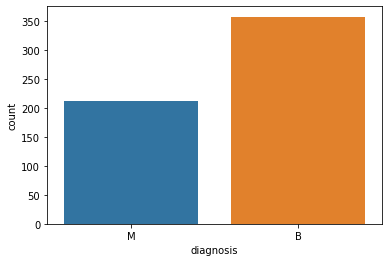

In [ ]:
#Visualize the count
sns.countplot(df['diagnosis'],label='count')

In [ ]:
#Look at the data types to see which columns need to be encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

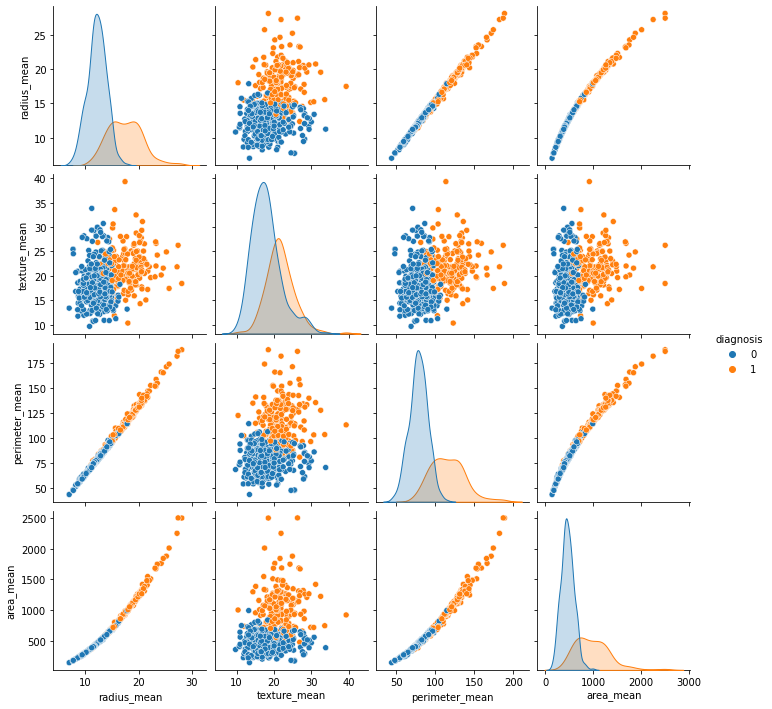

In [ ]:
#Create a pair plot
sns.pairplot(df.iloc[:,1:6],hue='diagnosis')

In [ ]:
#Print the first 5 rows of the new data 
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Get The Correlation of the columns
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


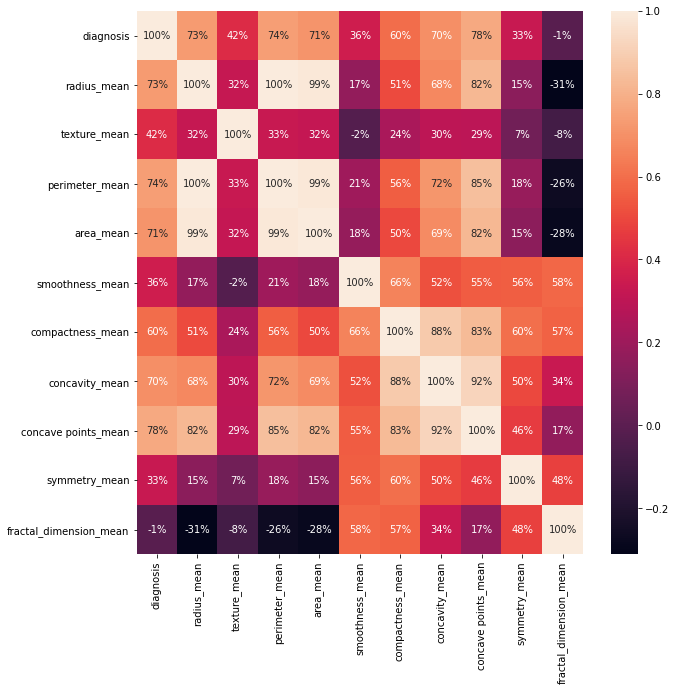

In [ ]:
#Visualize the correlation
from matplotlib import *
import sys
from pylab import *
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True, fmt='.0%')

In [ ]:
#Split the data set into independent (X) and dependent (Y) data sets
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values


In [ ]:
#Split the data set into 75% Training and 25% Testing 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [ ]:
#Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [ ]:
# Create a function for the models
def models(X_train, Y_train):

  #Logisitic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression (random_state=0)
  log.fit(X_train, Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train, Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  #Print the models accuracy on the training data
  print('[0] Logistic Regression Training Accuracy:', log.score(X_train,Y_train))
  print('[1] Decision Tree Classifier Training Accuracy:', tree.score(X_train,Y_train))
  print('[2] Random Forest Classifier Training Accuracy:', forest.score(X_train,Y_train))  
  
  return log, tree, forest

In [ ]:
model = models(X_train, Y_train)

[0] Logistic Regression Training Accuracy: 0.9906103286384976
[1] Decision Tree Classifier Training Accuracy: 1.0
[2] Random Forest Classifier Training Accuracy: 0.9953051643192489


In [ ]:
#test model accuracy data on confusuion matrix
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
  print('Model',i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  print(cm)
  print('Testing Accuracy =',(TP+TN)/(TP+ TN + FN + FP))
  print()

Model 0
[[86  4]
 [ 3 50]]
Testing Accuracy = 0.951048951048951

Model 1
[[83  7]
 [ 2 51]]
Testing Accuracy = 0.9370629370629371

Model 2
[[87  3]
 [ 2 51]]
Testing Accuracy = 0.965034965034965



In [ ]:
#Show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range( len(model) ):
  print('Model',i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Model 0
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model 1
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371

Model 2
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted av

In [ ]:
#Print the prediction of the Random Forest Classifier Model
pred = model[2].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


In [ ]:
#Counting Number Of People Having Cancer And Not Having Cancer of the Predicted Data

unique_pred, counts_pred = numpy.unique(pred, return_counts=True)
dict(zip(unique_pred, counts_pred))



{0: 89, 1: 54}

In [ ]:
#Counting Number Of People Having Cancer And Not Having Cancer of Testing Data
unique_test , counts_test = numpy.unique(Y_test,return_counts=True)
dict(zip(unique_test,counts_test))


{0: 90, 1: 53}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


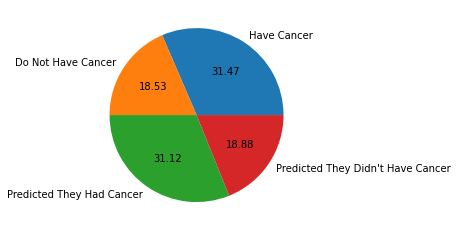

In [ ]:
#Representing Prediction Vs Actual Values Using Pie Diagram
test=(90,53,89,54)
labels =["Have Cancer","Do Not Have Cancer","Predicted They Had Cancer","Predicted They Didn't Have Cancer"]
plt.pie(test, labels = labels, autopct = "%.2f")
plt.axes().set_aspect("equal")
plt.show()